<a href="https://colab.research.google.com/github/talhaanwarch/ODIR2019/blob/master/effnet_tf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

#connect drive with colab notebook/
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Thu Feb 25 12:25:07 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P0    27W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
%%capture
!pip install focal-loss
!pip install -U efficientnet

EfficientNetB0 - (224, 224, 3)  
EfficientNetB1 - (240, 240, 3)  
EfficientNetB2 - (260, 260, 3)  
EfficientNetB3 - (300, 300, 3)  
EfficientNetB4 - (380, 380, 3)  
EfficientNetB5 - (456, 456, 3)  
EfficientNetB6 - (528, 528, 3)  
EfficientNetB7 - (600, 600, 3)  

https://github.com/keras-team/keras/issues/8130
https://stackoverflow.com/questions/56796331/how-to-input-multiple-images-with-flow-from-dataframe-in-keras

In [ ]:
#following are libraries to unpack 7z file
!pip install patool 
!pip install pyunpack
from pyunpack import Archive

In [ ]:
import pandas as pd
import numpy as np
import cv2

In [ ]:

#create a folder name as data
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [ ]:
#path where our data is saved
path='/content/drive/My Drive/thesis/'

In [ ]:
#extract the 7z file in data folder we created above
#this not only extract the data but move it from drive to colab for efficinet processing
#it will take some time
Archive(path+'ODIR-5K_Training_Images.7z').extractall('data')

In [ ]:
Archive(path+'ODIR-5K_Testing_Images.7z').extractall('data')


In [ ]:
#read the annottion file
annotation=pd.read_excel(path+'ODIR-5K_Training_Annotations(Updated)_V2.xlsx')

In [ ]:

#normal (N), diabetes (D), glaucoma (G), cataract (C), AMD (A), hypertension (H), myopia (M) and other diseases/abnormalities (O)

In [ ]:
#print first 5 rows of annotation file
#annotation=annotation.sample(frac=1)
annotation.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1
3,3,66,Male,3_left.jpg,3_right.jpg,normal fundus,branch retinal artery occlusion,0,0,0,0,0,0,0,1
4,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
annotation, val = train_test_split(annotation, test_size = 0.2,  random_state = 73)

In [ ]:
# for i in ['G',	'C',	'A',	'H',	'M']:
#   duplicate=annotation[annotation[i]==1]
#   annotation=annotation.append([duplicate]*10,ignore_index=True)

In [ ]:
annotation.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
3225,4371,58,Female,4371_left.jpg,4371_right.jpg,moderate non proliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0
2030,2653,31,Male,2653_left.jpg,2653_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
3054,4194,50,Female,4194_left.jpg,4194_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0
1558,2096,74,Male,2096_left.jpg,2096_right.jpg,mild nonproliferative retinopathy,cataract,0,1,0,1,0,0,0,0
3059,4199,67,Female,4199_left.jpg,4199_right.jpg,moderate non proliferative retinopathy，hyperte...,hypertensive retinopathy,0,1,0,0,0,1,0,0


In [ ]:
val.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
2891,4009,60,Male,4009_left.jpg,4009_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0
1811,2434,54,Male,2434_left.jpg,2434_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
441,442,56,Male,442_left.jpg,442_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0
1589,2127,70,Male,2127_left.jpg,2127_right.jpg,cataract,cataract,0,0,0,1,0,0,0,0
526,527,48,Male,527_left.jpg,527_right.jpg,branch retinal vein occlusion,normal fundus,0,0,0,0,0,0,0,1


In [ ]:
for i in ['N'	,'D'	,'G',	'C',	'A'	,'H'	,'M',	'O']:
  print(val[i].value_counts())

0    470
1    230
Name: N, dtype: int64
0    476
1    224
Name: D, dtype: int64
0    667
1     33
Name: G, dtype: int64
0    655
1     45
Name: C, dtype: int64
0    661
1     39
Name: A, dtype: int64
0    681
1     19
Name: H, dtype: int64
0    661
1     39
Name: M, dtype: int64
0    518
1    182
Name: O, dtype: int64


In [ ]:
# val=[]
# for i in ['N'	,'D'	,'G',	'C',	'A'	,'H'	,'M',	'O']:
#   df=annotation.sort_values(by=[i],ascending=False).head(20)
#   val.append(df)
#   annotation.drop(df.index,inplace=True)


In [ ]:
# val = pd.concat(val)
# val=val.sample(frac=1)
# val.head(5)

In [ ]:
test=pd.read_csv(path+'XYZ_ODIR.csv')
print(len(test))
test.head()


500


,ID,N,D,G,C,A,H,M,O
0,937,0,0,0,0,0,0,0,0
1,967,0,0,0,0,0,0,0,0
2,988,0,0,0,0,0,0,0,0
3,995,0,0,0,0,0,0,0,0
4,1000,0,0,0,0,0,0,0,0


In [ ]:
print(len(annotation))
print(len(val))
print(len(test))

2800
700
500


In [ ]:
left_test=[]
right_test=[]
ID=[]
for i in test['ID']:
  ID.append(i)
  left_test.append(str(i)+'_left.jpg')
  right_test.append(str(i)+'_right.jpg')

name_df=pd.DataFrame(zip(ID,left_test,right_test),columns=['ID','Left-Fundus','Right-Fundus'])
name_df.head()
result = pd.merge(name_df, test, on='ID')
result.head()

,ID,Left-Fundus,Right-Fundus,N,D,G,C,A,H,M,O
0,937,937_left.jpg,937_right.jpg,0,0,0,0,0,0,0,0
1,967,967_left.jpg,967_right.jpg,0,0,0,0,0,0,0,0
2,988,988_left.jpg,988_right.jpg,0,0,0,0,0,0,0,0
3,995,995_left.jpg,995_right.jpg,0,0,0,0,0,0,0,0
4,1000,1000_left.jpg,1000_right.jpg,0,0,0,0,0,0,0,0


In [ ]:
len(annotation)

2800

In [ ]:
img_shape=300

In [ ]:
#https://www.kaggle.com/ratthachat/aptos-eye-preprocessing-in-diabetic-retinopathy
def crop_image1(img,tol=7):
    # img is image data
    # tol  is tolerance
        
    mask = img>tol
    return img[np.ix_(mask.any(1),mask.any(0))]

def crop_image_from_gray(img,tol=7):
    if img.ndim ==2:
        mask = img>tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    elif img.ndim==3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img>tol
        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): # image is too dark so that we crop out everything,
            return img # return original image
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
    #         print(img1.shape,img2.shape,img3.shape)
            img = np.stack([img1,img2,img3],axis=-1)
    #         print(img.shape)
        return img

In [ ]:
def load_ben_color(image, sigmaX=10):
    #image = cv2.imread(path)
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = crop_image_from_gray(image)
    image = cv2.resize(image, (img_shape, img_shape))
    image=cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , sigmaX) ,-4 ,128)
    
    
    return image

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_gen= ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=.1,
    rescale=1/255,
    fill_mode='nearest',
    shear_range=0.1,
    brightness_range=[0.5, 1.5],
    preprocessing_function=load_ben_color
)

val_data_gen= ImageDataGenerator(
    rescale=1/255
    
)

In [ ]:
def get_flow_from_dataframe(generator, dataframe,directory_path,
                            image_shape=(img_shape, img_shape),
                            #subset='training',
                             batch_size=35):
    train_generator_1 = generator.flow_from_dataframe(dataframe,
                                                      directory=directory_path,
                                                      target_size=(img_shape,img_shape),
                                                      x_col="Left-Fundus",
                                                      y_col=['N'	,'D'	,'G',	'C',	'A'	,'H'	,'M',	'O'],
                                                      class_mode='raw',
                                                      shuffle=False,
                                                      batch_size=batch_size,
                                                      seed=7,
                                                      classes=['N'	,'D'	,'G',	'C',	'A'	,'H'	,'M',	'O']
                                                      #subset=subset
                                                      )

    train_generator_2 = generator.flow_from_dataframe(dataframe, 
                                                      directory=directory_path,
                                                      target_size=(img_shape,img_shape),
                                                      x_col="Right-Fundus",
                                                      y_col=['N'	,'D'	,'G',	'C',	'A'	,'H'	,'M',	'O'],
                                                      class_mode='raw',
                                                      shuffle=False,
                                                      batch_size=batch_size,
                                                      seed=7,
                                                      classes=['N'	,'D'	,'G',	'C',	'A'	,'H'	,'M',	'O']                                                     
                                                      #subset=subset
                                                      )
    while True:
        x_1 = train_generator_1.next()
        x_2 = train_generator_2.next()
        yield [x_1[0], x_2[0]], x_1[1]

In [ ]:
batch_size=15
train_gen = get_flow_from_dataframe(train_data_gen, annotation, image_shape=(img_shape, img_shape),
                                        directory_path="data/ODIR-5K_Training_Dataset/",batch_size=batch_size)
valid_gen = get_flow_from_dataframe(train_data_gen, val, image_shape=(img_shape, img_shape),
                                        directory_path="data/ODIR-5K_Training_Dataset/",batch_size=batch_size)
test_gen = get_flow_from_dataframe(train_data_gen, result, image_shape=(img_shape, img_shape),
                                        directory_path="data/ODIR-5K_Testing_Images/",batch_size=batch_size)

In [ ]:
img_shape

300

In [ ]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPool2D, BatchNormalization,Input,MaxPooling2D,GlobalMaxPooling2D,concatenate
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
import efficientnet.keras as efn 


In [ ]:
#from tensorflow.keras.applications import EfficientNetB3
left_input=Input(shape=(img_shape,img_shape,3))
right_input=Input(shape=(img_shape,img_shape,3))

left_model = efn.EfficientNetB3(input_shape =  (img_shape,img_shape,3), include_top = False, weights = 'imagenet',input_tensor=left_input)
right_model = efn.EfficientNetB3(input_shape =  (img_shape,img_shape,3), include_top = False, weights = 'imagenet',input_tensor=right_input)

left_model.trainable = False
right_model.trainable = False

In [ ]:
con = concatenate([left_model.output, right_model.output])
gap_dr = Dropout(0.5)(con)
GAP= GlobalAveragePooling2D()(gap_dr)
fc1=Dense(256, activation = 'relu')(GAP)
fc2=Dense(128, activation = 'relu')(fc1)
fc3=Dense(64, activation = 'relu')(fc2)
out = Dense(8, activation = 'sigmoid')(fc3)

In [ ]:

for layer in right_model._layers:
        layer._name = layer._name + '_right'
for layer in left_model._layers:
  layer._name = layer._name + '_left'

left_model._name="left_eff"
right_model._name="right_eff"

In [ ]:
model =Model(inputs=[left_input, right_input], outputs=out)


In [ ]:
# from keras.utils import plot_model
# plot_model(model)

In [ ]:
from focal_loss import BinaryFocalLoss
model.compile('adam',loss=BinaryFocalLoss(gamma=2),metrics=['accuracy'])

In [ ]:
step_size_train=len(annotation)/batch_size
step_size_val=len(val)/batch_size


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau,ModelCheckpoint
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3,
                              patience=3, min_lr=0.000001, verbose=1)
checkpoint = ModelCheckpoint('model.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')


In [ ]:
hist=model.fit(train_gen, epochs=10,
                        steps_per_epoch=step_size_train,
                        use_multiprocessing=False,
                        validation_data=valid_gen,
                        validation_steps=step_size_val,
                        verbose=2,callbacks=[reduce_lr,checkpoint],
                    
                        )

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:220: UserWarning: `classes` will be ignored given the class_mode="raw"
  .format(self.class_mode))


Found 2800 validated image filenames.
Found 2800 validated image filenames.
Epoch 1/10
Found 700 validated image filenames.
Found 700 validated image filenames.
186/186 - 577s - loss: 0.0901 - accuracy: 0.3554 - val_loss: 0.0805 - val_accuracy: 0.4329

Epoch 00001: val_loss improved from inf to 0.08054, saving model to model.h5
Epoch 2/10
186/186 - 541s - loss: 0.0813 - accuracy: 0.4229 - val_loss: 0.0785 - val_accuracy: 0.4600

Epoch 00002: val_loss improved from 0.08054 to 0.07846, saving model to model.h5
Epoch 3/10
186/186 - 536s - loss: 0.0788 - accuracy: 0.4457 - val_loss: 0.0778 - val_accuracy: 0.4586

Epoch 00003: val_loss improved from 0.07846 to 0.07784, saving model to model.h5
Epoch 4/10
186/186 - 532s - loss: 0.0769 - accuracy: 0.4568 - val_loss: 0.0760 - val_accuracy: 0.4786

Epoch 00004: val_loss improved from 0.07784 to 0.07597, saving model to model.h5
Epoch 5/10
186/186 - 531s - loss: 0.0760 - accuracy: 0.4743 - val_loss: 0.0778 - val_accuracy: 0.4657

Epoch 00005: va

In [ ]:
hist

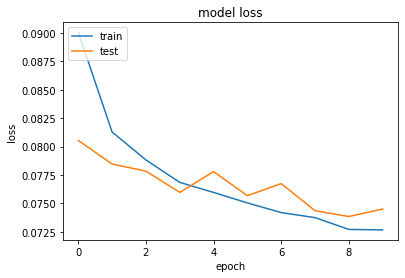

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict_generator(valid_gen,steps=step_size_val)
y_pred1=y_pred.copy()
y_pred1[y_pred1>=0.5] = 1
y_pred1[y_pred1<0.5] = 0
y_pred1=y_pred1.astype(int)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
# y_true=val_annotation.iloc[:,-8::].values
# y_true.shape

In [ ]:
# from sklearn.metrics import classification_report
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import multilabel_confusion_matrix

# multilabel_confusion_matrix(y_true, y_pred1)

In [ ]:
# target_names = ['N'	,'D'	,'G',	'C',	'A'	,'H'	,'M',	'O']
# print(classification_report(y_true, y_pred1, target_names=target_names))

In [ ]:
#model.load_weights('model.h5')

In [ ]:
y_test= model.predict(test_gen,steps=len(test)/batch_size)


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:220: UserWarning: `classes` will be ignored given the class_mode="raw"
  .format(self.class_mode))


Found 500 validated image filenames.
Found 500 validated image filenames.


In [ ]:
for i,j in enumerate(['N'	,'D'	,'G',	'C',	'A'	,'H'	,'M',	'O']):
  test[j]=y_test[:,i]

In [ ]:
test.head()

,ID,N,D,G,C,A,H,M,O
0,937,0.404540,0.448712,0.166569,0.156928,0.140467,0.210483,0.026884,0.400197
1,967,0.170219,0.729861,0.096241,0.067550,0.227045,0.325970,0.047197,0.356050
2,988,0.343683,0.478949,0.116035,0.242462,0.169859,0.187574,0.060665,0.417124
3,995,0.481523,0.518166,0.075349,0.084745,0.100590,0.149359,0.045543,0.391051
4,1000,0.492668,0.432084,0.181925,0.088703,0.125234,0.163709,0.035120,0.353531


In [ ]:
test.to_csv('/content/TAC_ODIR.csv',index=False)